In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np

In [13]:
np.random.seed(0)

# Generate a non-linear dataset based on the sine function
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()

print(X.shape , y.shape)

(80, 1) (80,)


In [9]:
# y[start:stop:step]

y[::5] += 3 * (0.5 - np.random.rand(16))  # add some noise to the data


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape , y_train.shape)

(56, 1) (56,)


In [14]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [15]:
X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]
# [:, np.newaxis] : This reshapes the 1D array into a 2D column vector.
y_grid = regressor.predict(X_grid)

print(X_grid.shape , y_grid.shape)

(485, 1) (485,)


/var/folders/68/g_j6jm596l5dg7k28vc763fh0000gn/T/ipykernel_1246/1449185565.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)[:, np.newaxis]


In [29]:
regressor.score(X_test,y_test)

0.26731292609482904

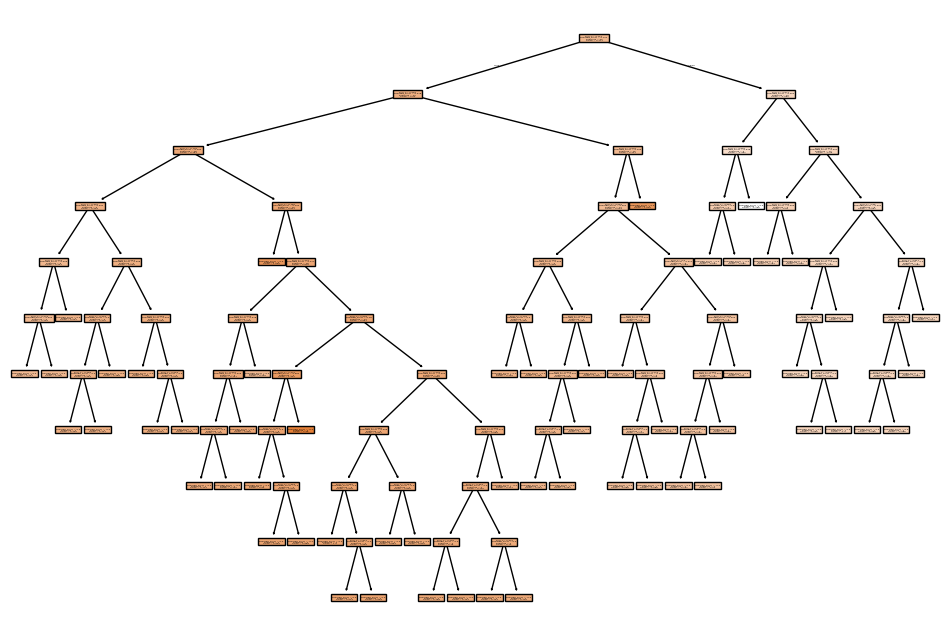

In [17]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 8))
plot_tree(regressor, filled=True)
plt.show()

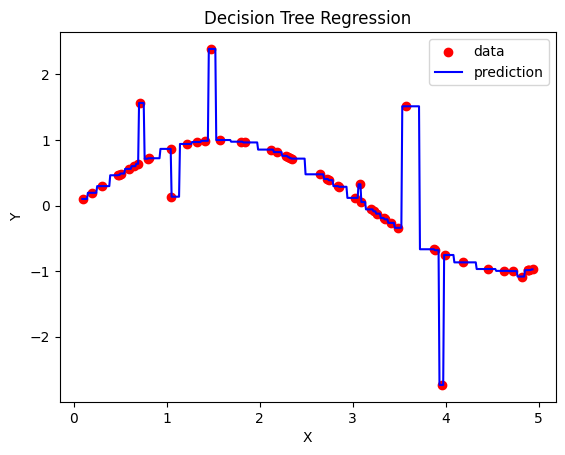

In [16]:
plt.scatter(X_train, y_train, color='red', label='data')
plt.plot(X_grid, y_grid, color='blue', label='prediction')
plt.title('Decision Tree Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV
param = {
"max_depth": [2, 4,8,10,None],
"criterion": ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
"max_features": [0.25,0.5,1.0],
"min_samples_split":[ 0.25,9.5,1.8]
}
grid = GridSearchCV(regressor, param_grid=param, cv = 10 , n_jobs=-1)
grid.fit(X_train,y_train)

/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/ba

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 9.5, 1.8]})

In [24]:
best_tree = grid.best_estimator_ 


/var/folders/68/g_j6jm596l5dg7k28vc763fh0000gn/T/ipykernel_1246/1342493729.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X_train), max(X_train), 0.01).reshape(-1, 1)


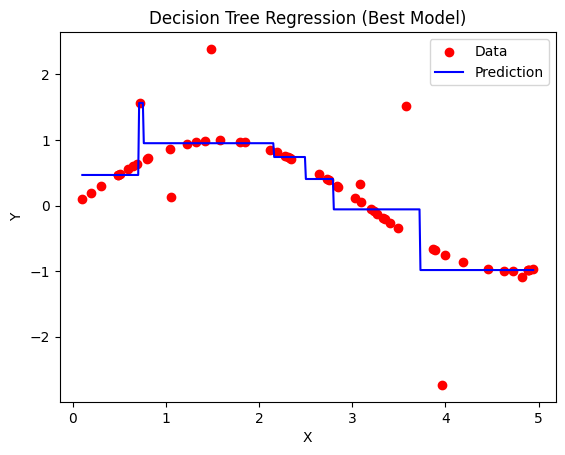

In [25]:
X_grid = np.arange(min(X_train), max(X_train), 0.01).reshape(-1, 1)
y_grid = best_tree.predict(X_grid)

plt.scatter(X_train, y_train, color='red', label='Data')
plt.plot(X_grid, y_grid, color='blue', label='Prediction')
plt.title('Decision Tree Regression (Best Model)')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [27]:
grid.best_score_

np.float64(0.7351899294520857)

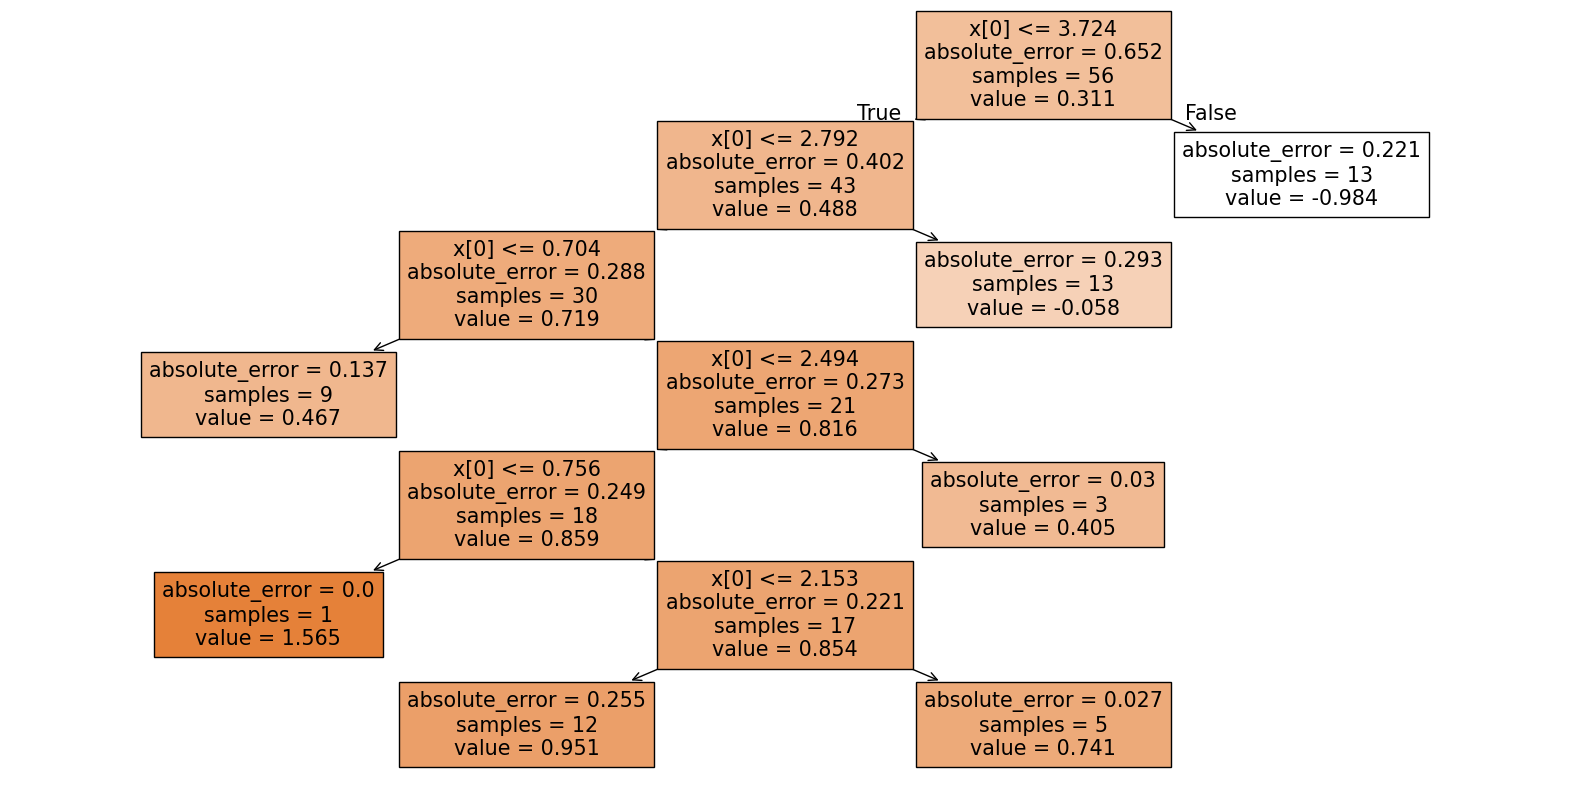

In [26]:

plt.figure(figsize=(20, 10))  # Optional: adjust size
plot_tree(best_tree , filled=True)
plt.show()

In [1]:
import pandas as pd

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=10, noise=0.1)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [9]:
from sklearn.tree import DecisionTreeRegressor
rt = DecisionTreeRegressor(criterion ='friedman_mse', max_depth=5)



In [10]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [11]:
y_pred = rt.predict(X_test)

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.3395456939633006

In [15]:
param = {
"max_depth": [2, 4,8,10,None],
"criterion": ['absolute_error', 'squared_error', 'friedman_mse', 'poisson'],
"max_features": [0.25,0.5,1.0],
"min_samples_split":[ 0.25,9.5,1.8]
}

In [17]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rt, param_grid=param, cv = 10 , n_jobs=-1)

In [18]:
grid.fit(X_train,y_train)

/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1350 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Users/akashjain/Desktop/Machine Learning/ML/lib/python3.9/site-packages/sklearn/ba

GridSearchCV(cv=10,
             estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                             max_depth=5),
             n_jobs=-1,
             param_grid={'criterion': ['absolute_error', 'squared_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 9.5, 1.8]})

In [19]:
grid.best_params_

{'criterion': 'absolute_error',
 'max_depth': 8,
 'max_features': 0.25,
 'min_samples_split': 0.25}

In [20]:
grid.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=8,
                      max_features=0.25, min_samples_split=0.25)

In [19]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 0.5,
 'min_samples_split': 0.25}

In [20]:
grid.best_score_

np.float64(0.22740591390513765)